In [11]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [23]:
from bluepy import Circuit
c = Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/CircuitConfig')
pos = c.cells.positions()

In [36]:
n = 456378
p = 0.000752 

In [37]:
g1 = igraph.Graph.Erdos_Renyi(n=n, p=p, directed=True, loops=False)

In [41]:
adj = g1.get_adjacency_sparse()

In [35]:
#sparse.save_npz('CA1_ER1',adj)

In [42]:
nonzero_idx = adj.nonzero()
dist = np.linalg.norm(pos.iloc[nonzero_idx[0]].values-pos.iloc[nonzero_idx[1]].values,axis=1)

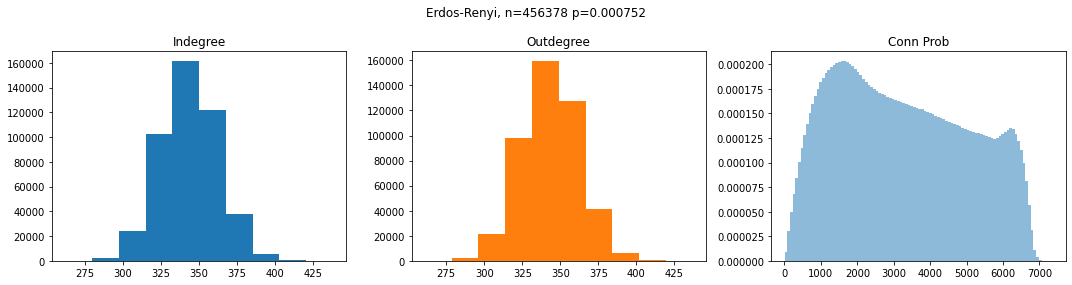

In [49]:
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,4))
axs[0].hist(g1.indegree())
axs[0].set_title('Indegree')
axs[1].hist(g1.outdegree())
axs[1].set_title('Outdegree')
axs[1].hist(g1.outdegree())
axs[2].hist(dist, density=True, bins=100, alpha = 0.5)
axs[2].set_title('Conn Prob')
plt.suptitle(f'Erdos-Renyi, n={n} p={p}')
plt.tight_layout()

In [45]:
np.save('CA1_ER2_indegree',g1.indegree())

In [46]:
np.save('CA1_ER2_outdegree',g1.outdegree())

In [47]:
np.save('CA1_ER2_distances',dist)

In [50]:
!pwd

/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topo_analysis/ca1-usecase
